In [3]:
# Kiểm tra torch và torchvision
import torch
import torchvision

print("Phiên bản torch:", torch.__version__)
print("Phiên bản torchvision:",torchvision.__version__)
print("Pytorch đã nhận gpu:", torch.cuda.is_available())

Phiên bản torch: 2.5.1+cu118
Phiên bản torchvision: 0.20.1+cu118
Pytorch đã nhận gpu: True


In [2]:
# Sử dụng thư viện ultralytics và kiểm tra phiên bản
import ultralytics
ultralytics.checks()

Ultralytics 8.3.86  Python-3.9.12 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete  (8 CPUs, 15.8 GB RAM, 231.1/631.5 GB disk)


In [3]:
# nếu bị trùng thư viện này thì dùng 
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
import os
import random
import shutil

# thiết lập đường dẫn thư mục chứa dữ liệu gốc và đầu ra
input_folder = r"E:\WorkspaceHDD\Labelima\data"

# thiết lập đường dẫn cho ảnh và nhãn của từng tập dữ liệu (train, val, test)
output_folder = r".\data"
images_train_folder = os.path.join(output_folder, "images/train")
images_val_folder = os.path.join(output_folder, "images/val")
images_test_folder = os.path.join(output_folder, "images/test")
labels_train_folder = os.path.join(output_folder, "labels/train")
labels_val_folder = os.path.join(output_folder, "labels/val")
labels_test_folder = os.path.join(output_folder, "labels/test")

# tạo thư mục nếu chưa tồn tại để tránh lỗi khi lưu dữ liệu
os.makedirs(images_train_folder, exist_ok=True)
os.makedirs(images_val_folder, exist_ok=True)
os.makedirs(images_test_folder, exist_ok=True)
os.makedirs(labels_train_folder, exist_ok=True)
os.makedirs(labels_val_folder, exist_ok=True)
os.makedirs(labels_test_folder, exist_ok=True)

# lấy danh sách tất cả file .jpg trong thư mục gốc
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

# shuffle dữ liệu để đảm bảo tính ngẫu nhiên
random.seed(1337)
random.shuffle(image_files)

# chia dữ liệu: 80% train, 10% val, 10% test
total_images = len(image_files)
train_split = int(0.8 * total_images)
val_split = int(0.9 * total_images)  # 80% train + 10% val

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

# hàm di chuyển file và nhãn tương ứng
def move_files(file_list, source_folder, dest_image_folder, dest_label_folder):
    for file_name in file_list:
        # Di chuyển file ảnh
        src_image = os.path.join(source_folder, file_name)
        dest_image = os.path.join(dest_image_folder, file_name)
        shutil.copy(src_image, dest_image)

        # Di chuyển file nhãn tương ứng
        label_name = file_name.replace('.jpg', '.txt')
        src_label = os.path.join(source_folder, label_name)
        dest_label = os.path.join(dest_label_folder, label_name)
        if os.path.exists(src_label):
            shutil.copy(src_label, dest_label)

# di chuyển file vào train, val, test
move_files(train_files, input_folder, images_train_folder, labels_train_folder)
move_files(val_files, input_folder, images_val_folder, labels_val_folder)
move_files(test_files, input_folder, images_test_folder, labels_test_folder)

print("Dữ liệu đã được chia thành công!")



Dữ liệu đã được chia thành công!


In [6]:
# đếm số lượng ảnh trong từng thư mục
train_count = len(os.listdir(images_train_folder))
val_count = len(os.listdir(images_val_folder))
test_count = len(os.listdir(images_test_folder))

print(f"Tổng số lượng ảnh: {total_images}")
print(f"Số lượng ảnh trong tập train: {train_count}")
print(f"Số lượng ảnh trong tập val: {val_count}")
print(f"Số lượng ảnh trong tập test: {test_count}")

Tổng số lượng ảnh: 2767
Số lượng ảnh trong tập train: 2213
Số lượng ảnh trong tập val: 277
Số lượng ảnh trong tập test: 277


Huấn luyện mô hình

In [6]:
from ultralytics import YOLO

# load a pretrained model (recommended for training)
model = YOLO("yolo11n.pt")

# huấn luyện mô hình
model.train(
    data="./data/data.yaml",  # đường dẫn file yaml cho data
    epochs=60, # số epoch (số lần quét toàn bộ data để train)
    imgsz=512,  # kích thước ảnh đầu vào
    batch=4,   # số ảnh xử lý cùng 1 lúc
    name="yolo11n-nhandienbienso",  # thư mục lưu mô hình sau khi train
    workers=4,   # số luồng xử lý khi load data
    device=0,  # sử dụng GPU để huấn luyện
    amp=False  # tắt amp do gtx 1650 hỗ trợ không tốt fp16, tránh mất thông tin
)

# @software{yolo11_ultralytics,
#   author = {Glenn Jocher and Jing Qiu},
#   title = {Ultralytics YOLO11},
#   version = {11.0.0},
#   year = {2024},
#   url = {https://github.com/ultralytics/ultralytics},
#   orcid = {0000-0001-5950-6979, 0000-0002-7603-6750, 0000-0003-3783-7069},
#   license = {AGPL-3.0}
# }

Ultralytics 8.3.86  Python-3.9.12 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./data/data.yaml, epochs=60, time=None, patience=100, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=yolo11n-nhandienbienso, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning E:\WorkspaceHDD\DoAn\VIETNAMESE-LICENSE-PLATE\YOLO\data\labels\train.cache... 2213 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2213/2213 [00:00<?, ?it/s]
val: Scanning E:\WorkspaceHDD\DoAn\VIETNAMESE-LICENSE-PLATE\YOLO\data\labels\val.cache... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolo11n-nhandienbienso\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs\detect\yolo11n-nhandienbienso
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60     0.773G     0.7104      1.245     0.9417          2        512: 100%|██████████| 554/554 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00,  9.01it/s]


                   all        277        278      0.695      0.838      0.736      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60     0.797G     0.7345     0.7354     0.9587          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.27it/s]

                   all        277        278      0.953       0.96      0.987        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60     0.785G     0.7128     0.6077     0.9487          2        512: 100%|██████████| 554/554 [01:18<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.58it/s]

                   all        277        278      0.981      0.929      0.983      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60     0.791G     0.7232     0.5592     0.9607          4        512: 100%|██████████| 554/554 [01:18<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.81it/s]

                   all        277        278      0.952      0.892       0.97      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60     0.791G     0.6707     0.4985     0.9345          4        512: 100%|██████████| 554/554 [01:18<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.61it/s]


                   all        277        278      0.985      0.977      0.994      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60     0.795G     0.6521     0.4658     0.9269          1        512: 100%|██████████| 554/554 [01:18<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.57it/s]

                   all        277        278      0.965      0.981      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60     0.795G     0.6358      0.439     0.9163          1        512: 100%|██████████| 554/554 [01:19<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.53it/s]

                   all        277        278      0.978      0.989      0.993      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60     0.773G     0.6472     0.4415     0.9179          3        512: 100%|██████████| 554/554 [01:18<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.94it/s]

                   all        277        278      0.979      0.995      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60     0.793G     0.6163     0.4232     0.9151          1        512: 100%|██████████| 554/554 [01:04<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 14.23it/s]

                   all        277        278      0.978      0.989      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60     0.795G     0.6193     0.4159       0.91          1        512: 100%|██████████| 554/554 [01:03<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 14.16it/s]

                   all        277        278      0.982      0.985      0.992      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60     0.795G     0.6099     0.4006     0.9077          4        512: 100%|██████████| 554/554 [01:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.99it/s]

                   all        277        278      0.982      0.993      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60     0.795G     0.6056     0.3878     0.9035          1        512: 100%|██████████| 554/554 [01:03<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.98it/s]

                   all        277        278      0.982      0.992      0.994      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60     0.791G      0.589     0.3813     0.9015          2        512: 100%|██████████| 554/554 [01:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.99it/s]

                   all        277        278      0.989      0.986      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60     0.795G     0.5828     0.3838     0.8978          1        512: 100%|██████████| 554/554 [01:04<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 14.00it/s]

                   all        277        278      0.964      0.976      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60     0.793G     0.5812      0.375     0.9024          4        512: 100%|██████████| 554/554 [01:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.83it/s]

                   all        277        278      0.989      0.996      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60     0.773G      0.573     0.3625     0.8933          1        512: 100%|██████████| 554/554 [01:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 14.08it/s]

                   all        277        278      0.993      0.984      0.994      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60     0.795G     0.5733     0.3602     0.8874          1        512: 100%|██████████| 554/554 [01:03<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.88it/s]

                   all        277        278      0.991      0.989      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60     0.795G     0.5653     0.3542     0.8881          4        512: 100%|██████████| 554/554 [01:04<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 13.81it/s]

                   all        277        278      0.989      0.993      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60     0.793G     0.5616     0.3547     0.8899          3        512: 100%|██████████| 554/554 [01:04<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:02<00:00, 14.33it/s]

                   all        277        278      0.979      0.992      0.992      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60     0.795G     0.5593      0.343     0.8847          0        512: 100%|██████████| 554/554 [01:15<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.57it/s]

                   all        277        278      0.963      0.986      0.993       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60     0.791G     0.5576     0.3418     0.8903          1        512: 100%|██████████| 554/554 [01:19<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.64it/s]

                   all        277        278      0.984      0.996      0.994      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60     0.795G     0.5435      0.335     0.8821          2        512: 100%|██████████| 554/554 [01:19<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.62it/s]

                   all        277        278       0.99      0.989      0.994      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60     0.793G     0.5494     0.3366     0.8866          4        512: 100%|██████████| 554/554 [01:18<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.77it/s]

                   all        277        278      0.989      0.995      0.994      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60     0.773G     0.5517     0.3295     0.8887          2        512: 100%|██████████| 554/554 [01:18<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.71it/s]

                   all        277        278      0.993      0.989      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60     0.795G     0.5335      0.329     0.8762          4        512: 100%|██████████| 554/554 [01:19<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.79it/s]

                   all        277        278      0.995      0.993      0.994      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60     0.795G     0.5381     0.3229     0.8789          3        512: 100%|██████████| 554/554 [01:18<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.66it/s]

                   all        277        278      0.992          1      0.994      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60     0.793G     0.5386     0.3206      0.881          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.17it/s]

                   all        277        278      0.993      0.994      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60     0.793G     0.5354     0.3129     0.8837          4        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.52it/s]

                   all        277        278      0.988          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60     0.789G     0.5258     0.3119     0.8715          4        512: 100%|██████████| 554/554 [01:19<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.42it/s]

                   all        277        278      0.997      0.993      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60     0.795G     0.5288     0.3169     0.8759          2        512: 100%|██████████| 554/554 [01:19<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.51it/s]

                   all        277        278      0.995          1      0.994      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60     0.793G     0.5173     0.3114     0.8695          2        512: 100%|██████████| 554/554 [01:20<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.59it/s]

                   all        277        278      0.985      0.993      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60     0.773G      0.517      0.304     0.8729          3        512: 100%|██████████| 554/554 [01:20<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.20it/s]

                   all        277        278      0.996          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60     0.793G     0.5189     0.2986     0.8724          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.62it/s]

                   all        277        278      0.996          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60     0.793G     0.5109     0.3013     0.8694          2        512: 100%|██████████| 554/554 [01:20<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.43it/s]

                   all        277        278      0.993      0.999      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60     0.793G     0.5144     0.2958     0.8692          1        512: 100%|██████████| 554/554 [01:19<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.39it/s]

                   all        277        278      0.992          1      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60     0.793G     0.4998     0.2962     0.8723          1        512: 100%|██████████| 554/554 [01:19<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.52it/s]

                   all        277        278      0.996      0.995      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60     0.791G     0.5064      0.296     0.8721          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.48it/s]

                   all        277        278      0.996          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60     0.793G     0.5031     0.2914     0.8696          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.58it/s]

                   all        277        278      0.996          1      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60     0.793G     0.4812     0.2816     0.8644          4        512: 100%|██████████| 554/554 [01:20<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.47it/s]

                   all        277        278      0.996          1      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60     0.773G      0.489     0.2791     0.8654          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.58it/s]

                   all        277        278      0.992          1      0.994      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60     0.793G     0.4854     0.2758     0.8602          3        512: 100%|██████████| 554/554 [01:20<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.64it/s]

                   all        277        278      0.996          1      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60     0.793G     0.4897     0.2724     0.8646          2        512: 100%|██████████| 554/554 [01:20<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.66it/s]

                   all        277        278      0.996          1      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60     0.793G      0.483      0.272     0.8605          2        512: 100%|██████████| 554/554 [01:20<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00,  9.44it/s]

                   all        277        278      0.992          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60     0.795G     0.4899     0.2777     0.8637          2        512: 100%|██████████| 554/554 [01:20<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.51it/s]


                   all        277        278      0.995      0.996      0.995        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60     0.791G     0.4755     0.2658     0.8639          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.46it/s]

                   all        277        278      0.996          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60     0.793G     0.4858     0.2726     0.8628          1        512: 100%|██████████| 554/554 [01:21<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.43it/s]

                   all        277        278      0.995          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60     0.793G     0.4766     0.2607     0.8605          2        512: 100%|██████████| 554/554 [01:20<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.44it/s]

                   all        277        278      0.999          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60     0.773G     0.4702     0.2588     0.8545          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.71it/s]

                   all        277        278      0.996          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60     0.793G     0.4684     0.2522     0.8569          4        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.48it/s]

                   all        277        278      0.996          1      0.994      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60     0.795G     0.4625     0.2527     0.8556          4        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.39it/s]

                   all        277        278      0.996          1      0.994      0.915


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60     0.791G     0.4405     0.2257     0.8397          1        512: 100%|██████████| 554/554 [01:22<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.46it/s]


                   all        277        278          1          1      0.995      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60     0.791G     0.4338     0.2239     0.8341          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.55it/s]

                   all        277        278          1          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60     0.787G     0.4282     0.2176     0.8315          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.50it/s]

                   all        277        278          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60     0.793G     0.4259     0.2131     0.8383          1        512: 100%|██████████| 554/554 [01:21<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.39it/s]

                   all        277        278          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60     0.791G     0.4233     0.2093     0.8249          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.43it/s]

                   all        277        278          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60     0.771G     0.4221     0.2071     0.8258          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.44it/s]

                   all        277        278          1          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60     0.791G     0.4161     0.2059     0.8272          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.53it/s]


                   all        277        278          1          1      0.995      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60     0.793G     0.4141     0.2018     0.8285          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00,  9.81it/s]

                   all        277        278          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60     0.791G     0.4088     0.1974     0.8235          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.23it/s]

                   all        277        278      0.999          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60     0.791G     0.4097     0.1977     0.8213          1        512: 100%|██████████| 554/554 [01:20<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.42it/s]

                   all        277        278          1          1      0.995      0.919



60 epochs completed in 1.360 hours.
Optimizer stripped from runs\detect\yolo11n-nhandienbienso\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\yolo11n-nhandienbienso\weights\best.pt, 5.5MB

Validating runs\detect\yolo11n-nhandienbienso\weights\best.pt...
Ultralytics 8.3.86  Python-3.9.12 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 10.55it/s]


                   all        277        278          1          1      0.995       0.92
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\yolo11n-nhandienbienso


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023FFD8C95B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

Nhận dạng vùng biển số

In [2]:
import cv2
from ultralytics import YOLO
# Load mô hình
model = YOLO("./runs/detect/yolo11n-nhandienbienso/weights/best.pt")

# Nhận diện và lấy kết quả
results = model("test.JPG")

# Lấy ảnh đã có bounding box
for result in results:
    image_and_boxes = result.plot()

    for box in result.boxes.xyxy:  # Duyệt qua các bounding box
        x1, y1, x2, y2 = map(int, box)  # Lấy tọa độ từng box
        plates = image_and_boxes[y1:y2, x1:x2]  # Cắt vùng biển số từ ảnh gốc

# Hiển thị ảnh
cv2.imshow("Detected", image_and_boxes)
cv2.waitKey(0)
cv2.destroyAllWindows()



image 1/1 E:\WorkspaceHDD\DoAn\VIETNAMESE-LICENSE-PLATE\Training\test.JPG: 512x384 1 biensoxe, 53.5ms
Speed: 3.3ms preprocess, 53.5ms inference, 129.3ms postprocess per image at shape (1, 3, 512, 384)


Xoay ảnh biển số

In [3]:
def align_license_plate(plates):
    # Bước 1: Vùng biển số đã xác định
    cv2.imshow("Original Plate", plates)
    cv2.waitKey(0)

    # Bước 2: Chuyển ảnh sang thang xám
    gray = cv2.cvtColor(plates, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Gray Scale", gray)
    cv2.waitKey(0)

    # Bước 3: Làm mờ ảnh để giảm nhiễu
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    cv2.imshow("Blurred", blurred)
    cv2.waitKey(0)

    # Bước 4: Phát hiện biên bằng Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)
    cv2.imshow("Edges", edges)
    cv2.waitKey(0)

    # Bước 5: Tìm các đường thẳng bằng Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    if lines is not None:
        # Tính góc nghiêng trung bình
        angles = [(line[0][1] * 180 / np.pi) - 90 for line in lines]
        median_angle = np.median(angles)

        # Căn chỉnh ảnh
        h, w = plates.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, median_angle, 1.0)
        aligned_plate = cv2.warpAffine(plates, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

        # Bước 6: Hiển thị ảnh đã căn chỉnh
        cv2.imshow("Aligned Plate", aligned_plate)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        return aligned_plate

    cv2.destroyAllWindows()
    return plates


In [4]:
import numpy as np
if plates is not None:
    aligned_plate = align_license_plate(plates)
    cv2.imshow("Aligned Plate", aligned_plate)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Phân đoạn kí tự

In [ ]:
import cv2
import numpy as np
# Hàm biến ảnh thành vuông
def convert2Square(img, size=28):

    h, w = img.shape[:2]
    max_dim = max(h, w)  # Kích thước lớn nhất để làm chuẩn

    # Tạo ảnh vuông có nền đen
    square_img = np.zeros((max_dim, max_dim), dtype=np.uint8)

    # Canh giữa ký tự trong ảnh vuông
    y_offset = (max_dim - h) // 2
    x_offset = (max_dim - w) // 2
    square_img[y_offset:y_offset + h, x_offset:x_offset + w] = img

    # Resize về 28x28
    final_img = cv2.resize(square_img, (size, size), interpolation=cv2.INTER_AREA)

    return final_img


In [20]:
import cv2
import numpy as np
from skimage import measure
from skimage.filters import threshold_local
import imutils
# Phân đoạn kí tự
def segment_characters(aligned_plate):
    # Bước 1: Chuyển sang không gian màu HSV và lấy kênh V (độ sáng)
    V = cv2.split(cv2.cvtColor(aligned_plate, cv2.COLOR_BGR2HSV))[2]

    # Bước 2: Áp dụng adaptive threshold
    T = threshold_local(V, 15, offset=10, method="gaussian")
    thresh = (V > T).astype("uint8") * 255
    cv2.imshow("Adaptive Threshold", thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Bước 3: Đảo màu chữ trắng, nền đen
    thresh = cv2.bitwise_not(thresh)

    # Bước 4: Resize ảnh để thống nhất kích thước xử lý
    thresh = imutils.resize(thresh, width=400)

    # Bước 5: Làm mờ ảnh để giảm nhiễu
    thresh = cv2.medianBlur(thresh, 5)
    cv2.imshow("Bitwise", thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Bước 6: Phân tích thành phần liên kết (Connected Components)
    labels = measure.label(thresh, connectivity=2, background=0)
    # plt.imshow(labels, cmap="jet")
    # plt.title("Labeled Connected Components")
    # plt.colorbar()
    # plt.show()
    characters = []
    bounding_boxes = []

    for label in np.unique(labels):
        if label == 0:
            continue

        # Tạo mask chỉ chứa thành phần hiện tại
        mask = np.zeros(thresh.shape, dtype="uint8")
        mask[labels == label] = 255

        # Tìm contour của thành phần
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            (x, y, w, h) = cv2.boundingRect(contour)

            # Lọc bỏ các vùng không phải ký tự (dựa trên tỷ lệ)
            aspectRatio = w / float(h)
            solidity = cv2.contourArea(contour) / float(w * h)
            heightRatio = h / float(aligned_plate.shape[0])

            if 0.1 < aspectRatio < 1.0 and solidity > 0.1 and 0.35 < heightRatio < 2.0:
                char_img = mask[y:y + h, x:x + w]

                #convert2Square
                char_img = convert2Square(char_img, size=28)

                characters.append(char_img)
                bounding_boxes.append((x, y, w, h))

    # Sắp xếp ký tự theo vị trí từ trái sang phải
    characters = [char for _, char in sorted(zip(bounding_boxes, characters), key=lambda b: b[0][0])]

    return characters


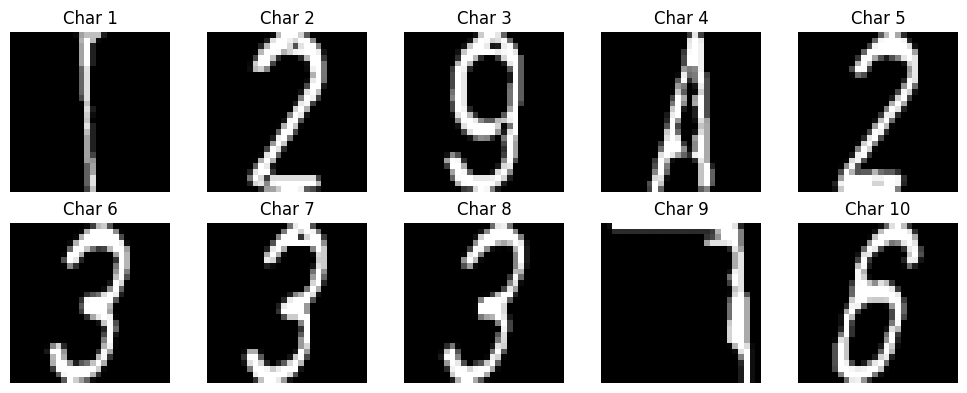

In [22]:
import matplotlib.pyplot as plt
# Hiển thị các kí tự tách được
def show_characters(characters):
    num_chars = len(characters)
    cols = 5  # Mỗi hàng 5 ký tự
    rows = (num_chars // cols) + (1 if num_chars % cols != 0 else 0)  # Tính số hàng

    fig, axes = plt.subplots(rows, cols, figsize=(10, 2 * rows))  # Tạo lưới hiển thị
    axes = axes.flatten()

    for i in range(len(axes)):
        if i < num_chars:
            axes[i].imshow(characters[i], cmap='gray')
            axes[i].set_title(f"Char {i+1}")
        axes[i].axis("off")  # Ẩn trục tọa độ

    plt.tight_layout()
    plt.show()

# Gọi sau khi tách ký tự
characters = segment_characters(aligned_plate)  # Tách ký tự đã có padding 28x28
show_characters(characters)  # Hiển thị ký tự
